In [1]:
import json
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

'' to import online ''\
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

"to open file in google colab"\
with open('Sarcasm_Headlines_Dataset.json','r') as f:
    datastore=json.load(f)

importing the dataset in json format

In [2]:
datastore = []
for line in open('Sarcasm_Headlines_Dataset.json','r'):
    datastore.append(json.loads(line))

In [3]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

Taking the required features from data  as which headline -> sentences & is_sarcastic -> labels.

In [4]:
sentences=[]
labels=[]
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
print(len(sentences),len(labels))

26709 26709


spliting data into train and test

In [6]:
train_sentences=sentences[:20000]
test_sentences=sentences[20000:]
train_labels=labels[0:20000]
test_labels=labels[20000:]

Text preporcessing

In [7]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

train_sequence=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequence,maxlen=100,padding='post',truncating='post')

test_sequence=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequence,maxlen=100,padding='post',truncating='post')


In [8]:
train_padded=np.array(train_padded)
test_padded=np.array(test_padded)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

Build the model

In [9]:
model =tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(train_padded,train_labels,epochs=10,validation_data=(test_padded,test_labels),verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.6622 - accuracy: 0.6029 - val_loss: 0.5743 - val_accuracy: 0.7629
Epoch 2/10
625/625 - 1s - loss: 0.4336 - accuracy: 0.8308 - val_loss: 0.3846 - val_accuracy: 0.8389
Epoch 3/10
625/625 - 2s - loss: 0.3113 - accuracy: 0.8771 - val_loss: 0.3783 - val_accuracy: 0.8269
Epoch 4/10
625/625 - 1s - loss: 0.2608 - accuracy: 0.8967 - val_loss: 0.3400 - val_accuracy: 0.8560
Epoch 5/10
625/625 - 1s - loss: 0.2243 - accuracy: 0.9136 - val_loss: 0.3404 - val_accuracy: 0.8577
Epoch 6/10
625/625 - 1s - loss: 0.1965 - accuracy: 0.9262 - val_loss: 0.3520 - val_accuracy: 0.8529
Epoch 7/10
625/625 - 1s - loss: 0.1747 - accuracy: 0.9352 - val_loss: 0.3610 - val_accuracy: 0.8539
Epoch 8/10
625/625 - 1s - loss: 0.1558 - accuracy: 0.9427 - val_loss: 0.3814 - val_accuracy: 0.8475
Epoch 9/10
625/625 - 2s - loss: 0.1407 - accuracy: 0.9495 - val_loss: 0.3922 - val_accuracy: 0.8527
Epoch 10/10
625/625 - 1s - loss: 0.1267 - accuracy: 0.9550 - val_loss: 0.4152 - val_accuracy: 0.8509

histogram for loss and accuracy

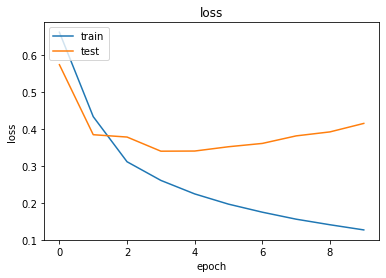

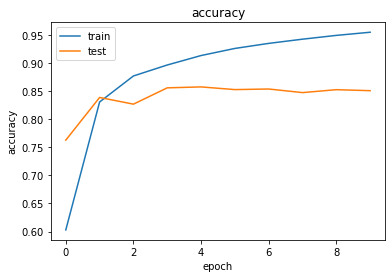

In [12]:
import matplotlib.pyplot as plt
def histogram(string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title(string)
    plt.ylabel(string)
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()
histogram('loss')
histogram('accuracy')